Vector Autoregression:

-- Medium Post: https://towardsdatascience.com/vector-auto-regression-for-multivariate-time-series-forecasting-cf5216c9ce23
-- Machine Learning Post: https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

Step 1. Used ChatGPT to create time series datasets (prompt "create a dataset that includes multiple time series")

In [1]:
import pandas as pd
import numpy as np
import random
import datetime

# Generate date range for time series
start_date = datetime.date(2023, 1, 1)
end_date = datetime.date(2023, 12, 31)
date_range = pd.date_range(start_date, end_date, freq='D')

# Create Stock Prices Time Series
stock_prices = {
    'Company A': [random.uniform(50, 150) for _ in range(len(date_range))],
    'Company B': [random.uniform(30, 120) for _ in range(len(date_range))],
    'Company C': [random.uniform(40, 140) for _ in range(len(date_range))]
}

stock_df = pd.DataFrame(stock_prices, index=date_range)

# Create Temperature Data Time Series
temperature_data = {
    'City X': [random.uniform(0, 35) for _ in range(len(date_range))],
    'City Y': [random.uniform(-10, 30) for _ in range(len(date_range))],
    'City Z': [random.uniform(15, 40) for _ in range(len(date_range))]
}

temperature_df = pd.DataFrame(temperature_data, index=date_range)

# Create Website Traffic Time Series
hourly_range = pd.date_range(start_date, end_date, freq='H')
website_traffic = {
    'Website 1': [random.randint(0, 500) for _ in range(len(hourly_range))],
    'Website 2': [random.randint(0, 600) for _ in range(len(hourly_range))],
    'Website 3': [random.randint(0, 450) for _ in range(len(hourly_range))]
}

website_df = pd.DataFrame(website_traffic, index=hourly_range)

# You can save these DataFrames to CSV files if needed.
stock_df.to_csv('stock_prices.csv')
temperature_df.to_csv('temperature_data.csv')
website_df.to_csv('website_traffic.csv')


Step 2. Install/Import necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

Step 3. Visualize the Time Series 

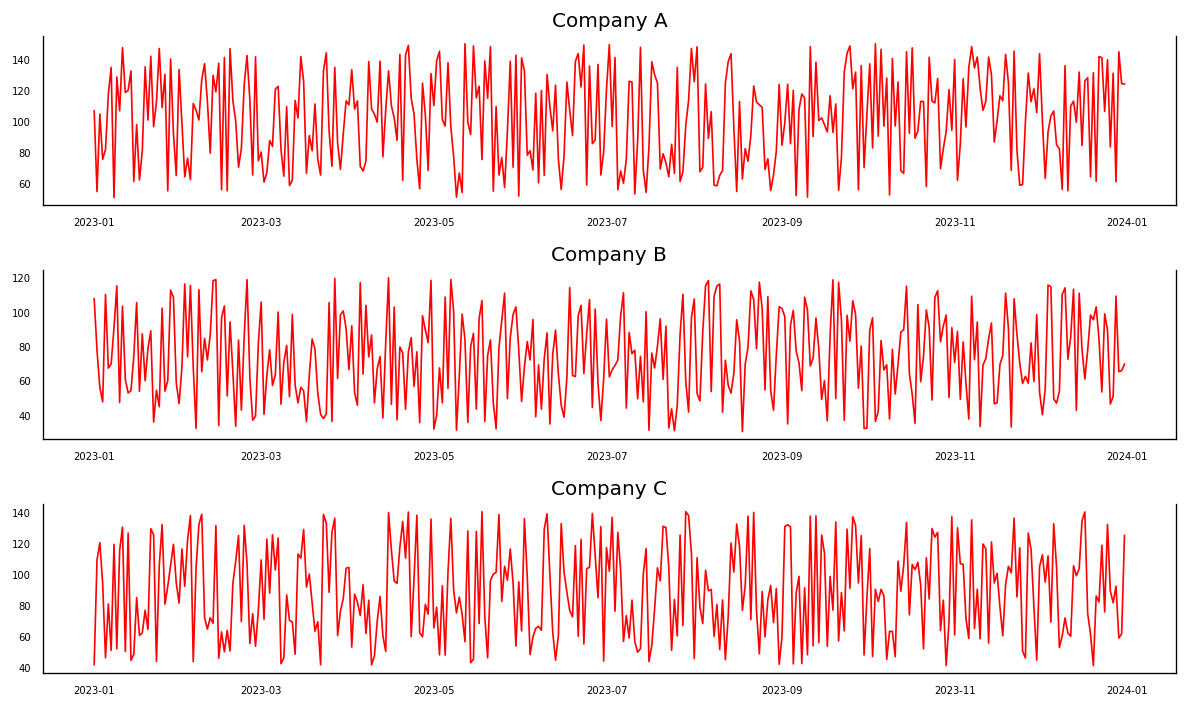

In [9]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = stock_df[stock_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(stock_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Test causation using Granger's Causality Test

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(stock_df, variables = stock_df.columns)

/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/stats

,Company A_x,Company B_x,Company C_x
Company A_y,1.0000,0.3482,0.2498
Company B_y,0.2139,1.0000,0.0509
Company C_y,0.0271,0.3358,1.0000


Stocks aren't a good use for VAR because there is only 1 p<0.05

Going to try website_df next

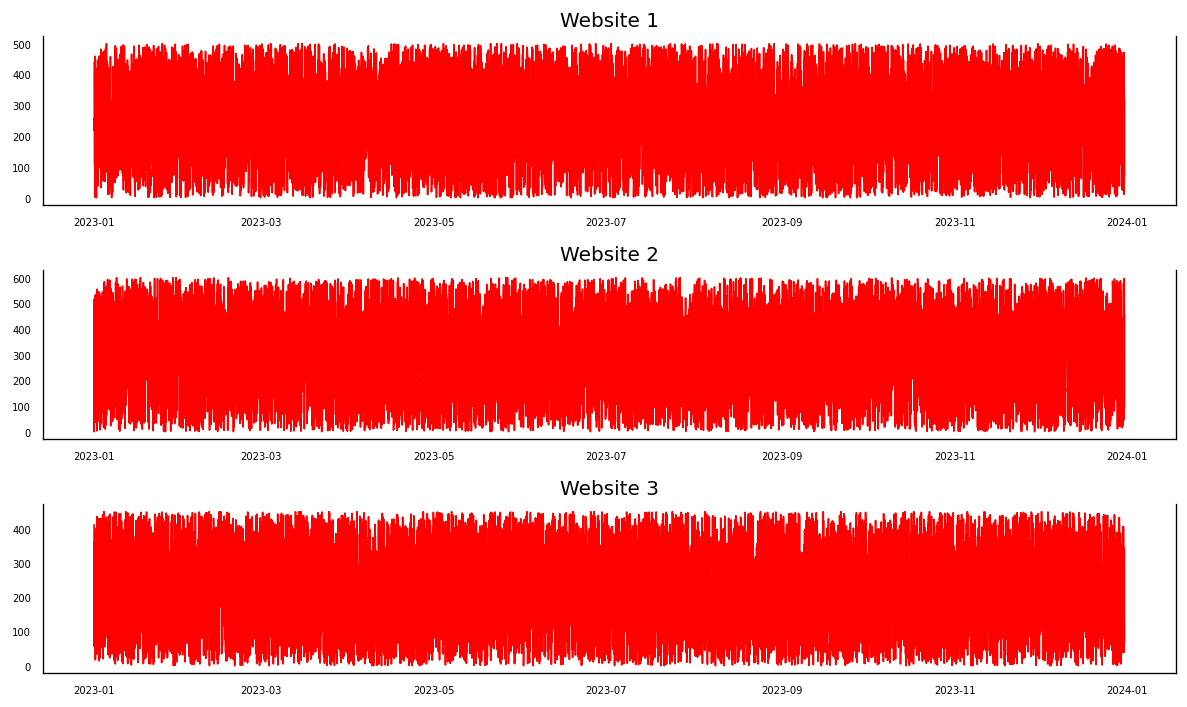

In [13]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = website_df[website_df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(website_df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [15]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(website_df, variables = website_df.columns)

/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does

,Website 1_x,Website 2_x,Website 3_x
Website 1_y,1.0000,0.1375,0.0852
Website 2_y,0.1281,1.0000,0.1087
Website 3_y,0.3780,0.0818,1.0000


These might be ok to use. They're not <0.05 but several are close. Going to check temperature next

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(temperature_df, variables = temperature_df.columns)

/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/kelly.bergen/.local/share/virtualenvs/kelly.bergen-wfyP5uws/lib/python3.8/site-packages/stats

,City X_x,City Y_x,City Z_x
City X_y,1.0000,0.2645,0.0625
City Y_y,0.0081,1.0000,0.1293
City Z_y,0.4059,0.1302,1.0000


We'll try moving on with temperature as the example

Cointegration Test is next

In [17]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(temperature_df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
City X ::  116.77    > 24.2761   =>   True
City Y ::  54.82     > 12.3212   =>   True
City Z ::  0.68      > 4.1296    =>   False


Before splitting into testing and training, I'm going to do some additional checks on my data

In [18]:
temperature_df.info()
temperature_df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City X  365 non-null    float64
 1   City Y  365 non-null    float64
 2   City Z  365 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB


,City X,City Y,City Z
count,365.000000,365.000000,365.000000
mean,17.476373,10.364226,26.900754
std,9.865052,11.740922,7.165832
min,0.048440,-9.961309,15.011559
25%,9.097254,-0.179264,20.847588
50%,17.832303,10.508050,26.926135
75%,25.615365,20.254823,32.967089
max,34.761615,29.877771,39.967244


These look good. I have 365 obs for each city. I'm going to split my training and testing datasets now so I can try to predict the next 7 temps.

In [20]:
nobs = 7
df_train, df_test = temperature_df[0:-nobs], temperature_df[-nobs:]

# Check size
print(df_train.shape)  # (358, 3)
print(df_test.shape)  # (7, 3)

(358, 3)
(7, 3)


Check for stationarity using Augmented Dickey-Fuller test

In [26]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

    # ADF Test on each column
for name, column in df_train.items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "City X" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -18.9878
 No. Lags Chosen       = 0
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "City Y" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.4867
 No. Lags Chosen       = 0
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "City Z" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

Each city passes the stationary test

Select the order (P)

In [28]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  13.473052860168902
BIC :  13.603396920060655
FPE :  710025.151907132
HQIC:  13.52489633019416 

Lag Order = 2
AIC :  13.500501632820155
BIC :  13.729079007392887
FPE :  729793.4595128507
HQIC:  13.591426237644965 

Lag Order = 3
AIC :  13.544947702518398
BIC :  13.872168924164209
FPE :  762984.0667411584
HQIC:  13.675124944877822 

Lag Order = 4
AIC :  13.562147977469579
BIC :  13.988426450950417
FPE :  776263.3473469785
HQIC:  13.73175057161863 

Lag Order = 5
AIC :  13.565894796070195
BIC :  14.091646826474722
FPE :  779245.3753863928
HQIC:  13.775096679502566 

Lag Order = 6
AIC :  13.601686160904329
BIC :  14.227330981952884
FPE :  807744.6355359465
HQIC:  13.850662506214618 

Lag Order = 7
AIC :  13.631889795283543
BIC :  14.357849597986526
FPE :  832662.2908907196
HQIC:  13.920817022175092 

Lag Order = 8
AIC :  13.647543020280537
BIC :  14.474242981955564
FPE :  845999.5635002939
HQIC:  13.976598807721038 

Lag Order = 9
AIC :  13.672818413151273
BIC :  14.6

Lag 1 has loest AIC

In [29]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,13.46*,13.49*,6.992e+05*,13.47*
1,13.47,13.60,7.085e+05,13.52
2,13.49,13.73,7.254e+05,13.59
3,13.53,13.87,7.552e+05,13.67
4,13.56,13.99,7.747e+05,13.73
5,13.57,14.10,7.792e+05,13.78
6,13.60,14.24,8.093e+05,13.86
7,13.63,14.37,8.328e+05,13.92
8,13.66,14.49,8.525e+05,13.99
9,13.68,14.61,8.721e+05,14.05


Confirms Lag 1

In [30]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, Oct, 2023
Time:                     15:39:12
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    13.6034
Nobs:                     357.000    HQIC:                   13.5249
Log likelihood:          -3912.62    FPE:                    710025.
AIC:                      13.4731    Det(Omega_mle):         686684.
--------------------------------------------------------------------
Results for equation City X
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            17.550793         2.347207            7.477           0.000
L1.City X        -0.011819         0.053465           -0.221           0.825
L1.City Y        -0.048593         0.044615           -1.089           0.27

Check for serial correlation 

In [33]:
def adjust(val, length=6):
    return str(val).ljust(length)

out = durbin_watson(model_fitted.resid)

for col, val in zip(df_train.columns, out):
    print(adjust(col), ':', round(val, 2))

City X : 2.0
City Y : 1.99
City Z : 2.0


In [34]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

1


array([[32.84593898,  4.15340394, 26.06013146]])

Forecast time!

In [38]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=temperature_df.index[-nobs:], columns=temperature_df.columns + '_forecast')
df_forecast

,City X_forecast,City Y_forecast,City Z_forecast
2023-12-25,17.511325,12.682907,26.968379
2023-12-26,17.297278,10.648343,27.027557
2023-12-27,17.399924,10.441741,27.012538
2023-12-28,17.408433,10.444241,27.010746
2023-12-29,17.408174,10.446084,27.010738
2023-12-30,17.408087,10.446189,27.010752
2023-12-31,17.408083,10.446181,27.010753


Plot against actuals

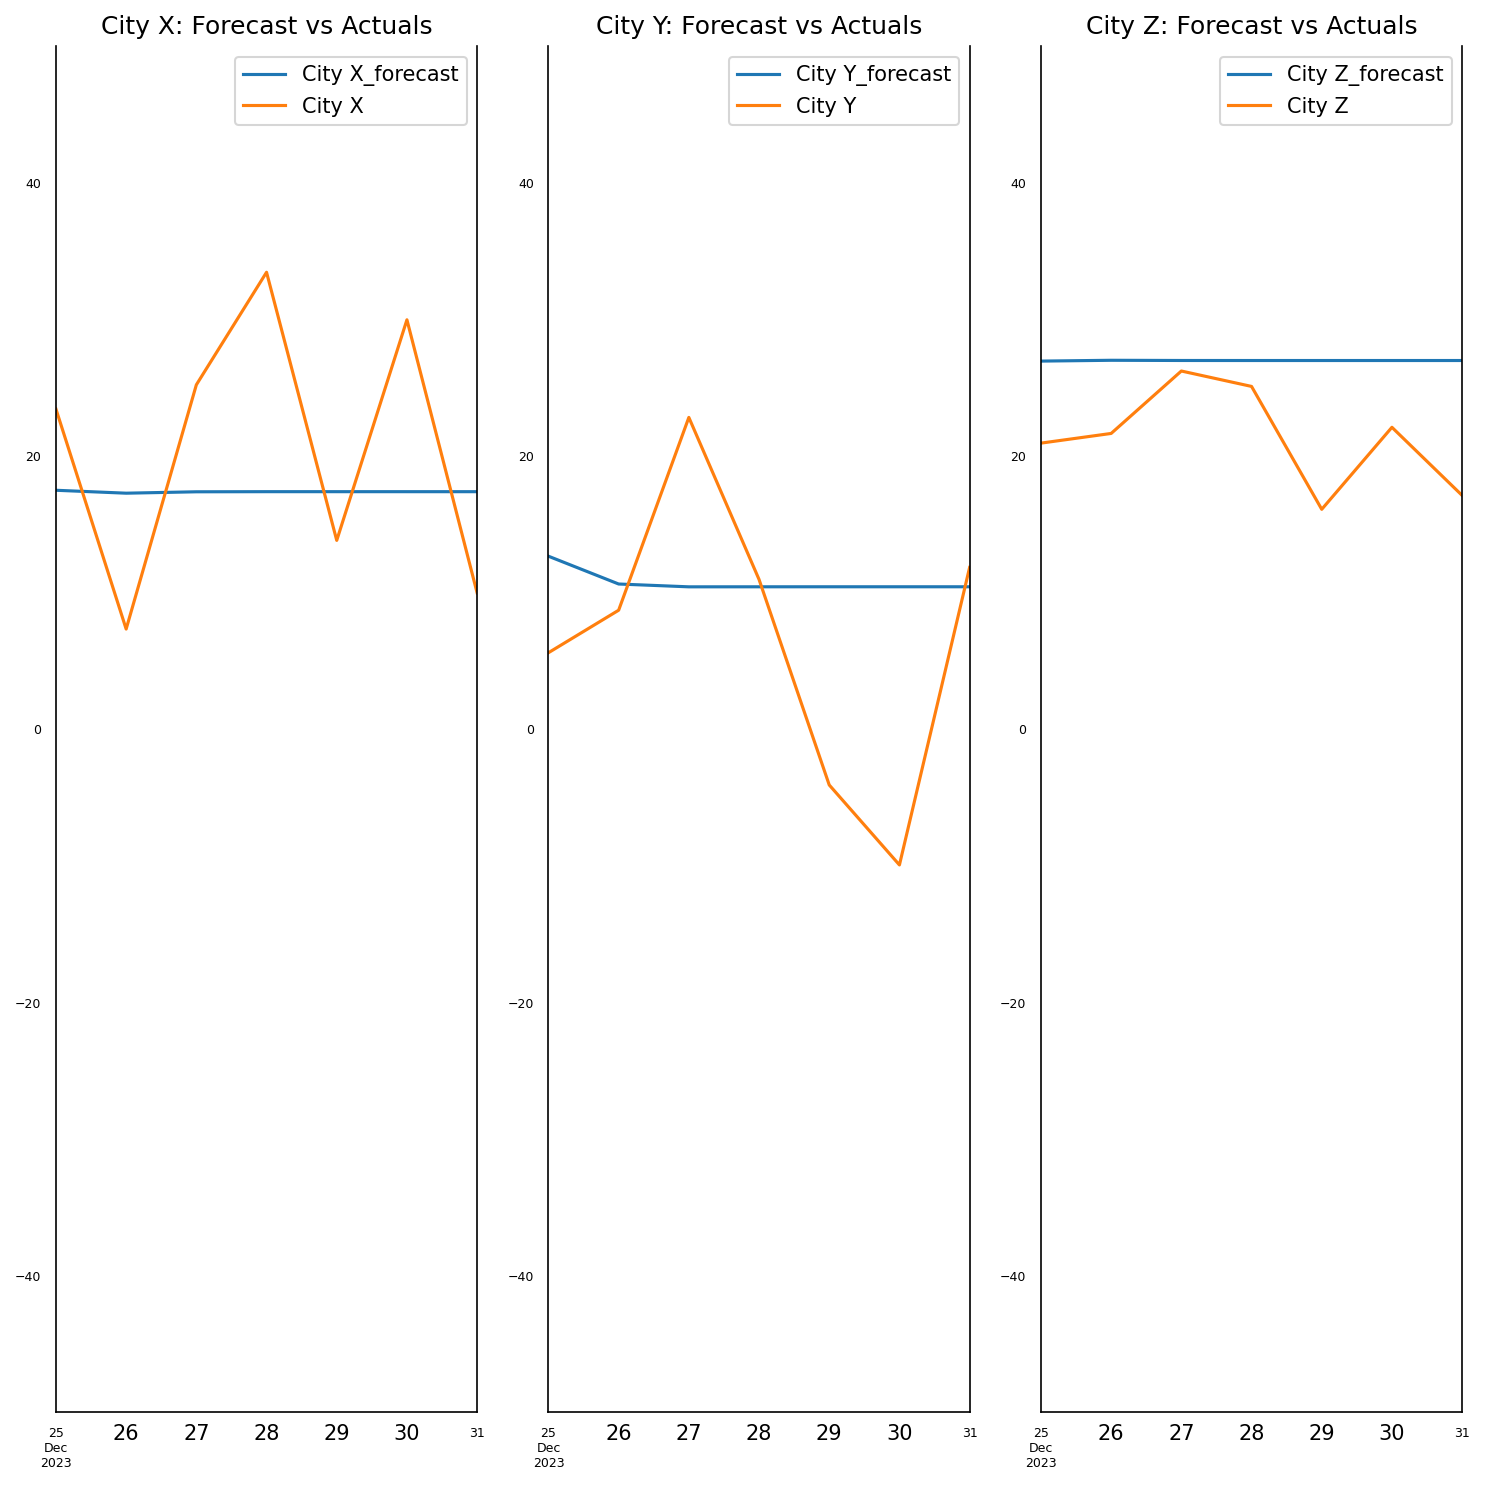

In [43]:
fig, axes = plt.subplots(nrows=int(len(temperature_df.columns)/2), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(temperature_df.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.set_ylim(-50, 50)

plt.tight_layout();

The forecasts aren't great, but they're within reason! I think I might be able to improve the model by including more years of data due
to the seasonal nature of temperatures.

In [47]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: City X')
accuracy_prod = forecast_accuracy(df_forecast['City X_forecast'].values, df_test['City X'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: City Y')
accuracy_prod = forecast_accuracy(df_forecast['City Y_forecast'].values, df_test['City Y'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: City Z')
accuracy_prod = forecast_accuracy(df_forecast['City Z_forecast'].values, df_test['City Z'].values)
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))



Forecast Accuracy of: City X
mape   :  0.545
me     :  -3.0716
mae    :  9.0492
mpe    :  0.1269
rmse   :  9.8531
corr   :  0.4588
minmax :  0.3813

Forecast Accuracy of: City Y
mape   :  1.116
me     :  4.2144
mae    :  8.3164
mpe    :  -0.694
rmse   :  10.9218
corr   :  -0.033
minmax :  0.6839

Forecast Accuracy of: City Z
mape   :  0.3017
me     :  5.6699
mae    :  5.6699
mpe    :  0.3017
rmse   :  6.6449
corr   :  0.0738
minmax :  0.2099


I don't know how to interpret these results, so I asked ChatGPT:

City Z appears to have the most accurate forecasts with the lowest MAPE, MAE, and RMSE.
City X has a positive ME, indicating an overall tendency to underestimate, but it has the highest positive correlation.
City Y has the highest MAPE, MPE, and RMSE, suggesting less accurate forecasts.
City Z also has a relatively stable range of errors (lowest min-max), indicating consistency in its forecasts.